In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from utils import *
from sklearn.metrics import mean_squared_error

# Define relevant paths
jump_file_path = "comp_tension/_12182024_140310.txt"

# Import jump data
jump_df = pd.read_csv(jump_file_path, skiprows=1)

jump_df.head()

,time,0_rod(extensions compound_M3NgX2).X,0_rod(extensions compound_M3NgX2).Y,0_rod(extensions compound_M3NgX2).Z,0_rod(extensions compound_M3NgX2).Euler1,0_rod(extensions compound_M3NgX2).Euler2,0_rod(extensions compound_M3NgX2).Euler3,0_rod(extensions compound_M3NgX2).mass,1_rod(extensions compound_M3NgX2).X,1_rod(extensions compound_M3NgX2).Y,...,42_SCA(springs).RestLen,42_SCA(springs).CurrLen,42_SCA(springs).Tension,43_SCA(springs).RestLen,43_SCA(springs).CurrLen,43_SCA(springs).Tension,44_SCA(activated_cable c1).RestLen,44_SCA(activated_cable c1).CurrLen,44_SCA(activated_cable c1).Tension,Unnamed: 208
0,0.005,-0.164805,3.64938,1.24167,-0.008163,-0.009276,0.021617,0.09289,-0.164805,3.64938,...,2.75424,3.00678,103.5410,2.75424,3.02500,111.0120,5.81557,5.73614,0.0,NaN
1,0.010,-0.156193,3.68574,1.21641,-0.011105,-0.013888,0.031094,0.09289,-0.156193,3.68574,...,2.75424,3.00607,103.2520,2.75424,3.02620,111.5050,5.81557,5.66986,0.0,NaN
2,0.015,-0.149285,3.71537,1.17713,-0.010832,-0.013257,0.030514,0.09289,-0.149285,3.71537,...,2.75424,3.00085,101.1120,2.75424,3.01228,105.7970,5.81557,5.61869,0.0,NaN
3,0.020,-0.144535,3.73896,1.12772,-0.008957,-0.009263,0.024107,0.09289,-0.144535,3.73896,...,2.75424,2.99261,97.7306,2.75424,2.99302,97.8994,5.81557,5.57895,0.0,NaN
4,0.025,-0.141258,3.75848,1.07237,-0.006789,-0.004032,0.015911,0.09289,-0.141258,3.75848,...,2.75424,2.98333,93.9258,2.75424,2.97643,91.0990,5.81557,5.54605,0.0,NaN


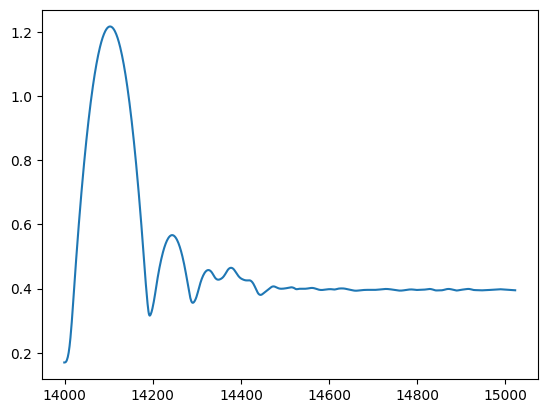

In [157]:
# Consider only restults after the jump occurs to ignore settling motion
release_time       = 70
sim_time           = jump_df['time']
closest_time_index = (sim_time - release_time).abs().idxmin()

avg_pos = extract_position_data(jump_df)[closest_time_index:]

plt.plot(avg_pos.avg_y)

In [158]:
# Select columns that end with 'Tension' and the 'time' column
tension_columns = [col for col in jump_df.columns if col.endswith('Tension')]
tension_columns.insert(0, 'time')

# Create a new dataframe with the selected columns
tension_df = jump_df[tension_columns]

tension_df.head()

,time,18_SCA(activated_cable c3).Tension,19_SCA(activated_cable c2).Tension,20_SCA(springs).Tension,21_SCA(springs).Tension,22_SCA(springs).Tension,23_SCA(springs).Tension,24_SCA(springs).Tension,25_SCA(springs).Tension,26_SCA(springs).Tension,...,35_SCA(springs).Tension,36_SCA(springs).Tension,37_SCA(springs).Tension,38_SCA(springs).Tension,39_SCA(springs).Tension,40_SCA(springs).Tension,41_SCA(springs).Tension,42_SCA(springs).Tension,43_SCA(springs).Tension,44_SCA(activated_cable c1).Tension
0,0.005,0.0,0.0,83.8030,102.6170,99.4954,98.3678,76.2059,101.0660,98.7666,...,99.8179,99.5902,99.5592,99.3574,99.6663,100.5110,98.3466,103.5410,111.0120,0.0
1,0.010,0.0,0.0,73.7574,100.4850,99.3115,97.1427,66.8838,101.8310,95.8278,...,100.4150,98.0579,98.0877,97.5296,97.8221,100.9960,94.8467,103.2520,111.5050,0.0
2,0.015,0.0,0.0,71.5392,96.5561,98.8948,94.8621,67.3981,100.9050,93.3601,...,101.0250,94.9285,95.4710,94.8277,94.6486,100.8250,90.9799,101.1120,105.7970,0.0
3,0.020,0.0,0.0,75.0952,92.7775,97.4390,92.1000,73.5191,98.5910,92.4604,...,100.6070,91.0061,92.5598,91.6296,91.3445,99.7670,87.9277,97.7306,97.8994,0.0
4,0.025,0.0,0.0,81.6747,90.2336,95.1739,89.8592,81.7861,95.7077,92.8691,...,98.9525,87.8481,90.4754,88.8977,89.1950,97.8437,86.5679,93.9258,91.0990,0.0


In [159]:
# Select columns that contain 'activated_cable' and the 'time' column
activated_cable_columns = [col for col in tension_df.columns if 'activated_cable' in col]
activated_cable_columns.insert(0, 'time')

# Create a new dataframe with the selected columns
activated_cable_df         = tension_df[activated_cable_columns]
activated_cable_df.columns = ['time', 'act1_tension', 'act2_tension', 'act3_tension']

activated_cable_df.head()

,time,act1_tension,act2_tension,act3_tension
0,0.005,0.0,0.0,0.0
1,0.010,0.0,0.0,0.0
2,0.015,0.0,0.0,0.0
3,0.020,0.0,0.0,0.0
4,0.025,0.0,0.0,0.0


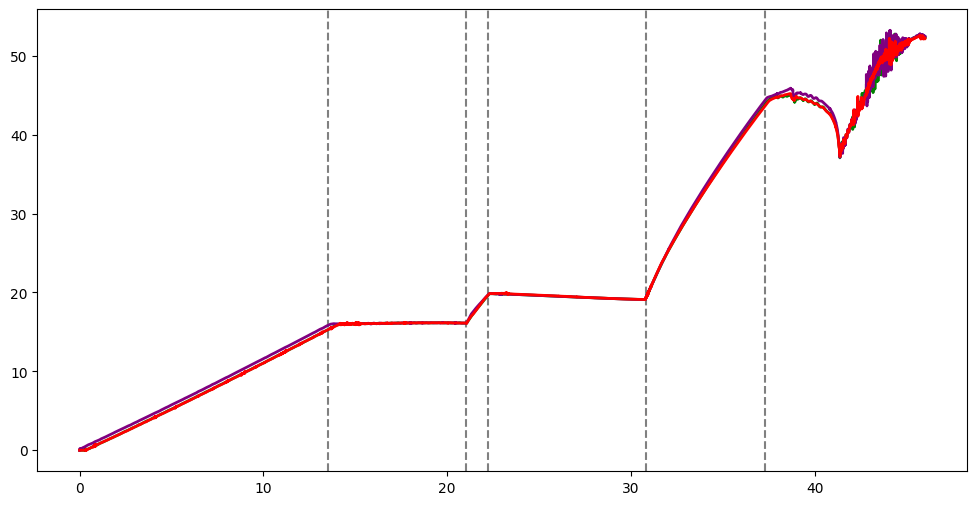

In [193]:
# Extract only the period of compression
comp_start_time  = 16
comp_end_time    = 63.8
comp_start_index = (sim_time - comp_start_time).abs().idxmin()
comp_end_index   = (sim_time - comp_end_time).abs().idxmin()

plot_df      = activated_cable_df[comp_start_index:comp_end_index].reset_index(drop=True)
plot_df.time = plot_df.time - comp_start_time

# Convert from dN to N
plot_df.act1_tension = plot_df.act1_tension / 10
plot_df.act2_tension = plot_df.act2_tension / 10
plot_df.act3_tension = plot_df.act3_tension / 10

# Create compression axis
plot_df['compression'] = np.linspace(0, 46, len(plot_df))

# Plot the tension in each actuator cable

# Set the colourmap
colors = plt.cm.Reds([0.2, 0.5, 0.8])

plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Add dashed lines to show change in regimes
dashed = [13.5, 21, 22.2, 30.8, 37.3]
for xc in dashed:
    plt.axvline(x=xc, color='gray', linestyle='--')

# Add tensions
line_width = 2
plt.plot(plot_df.compression, plot_df.act1_tension, label='Actuator Cable 1', linewidth=line_width, color='green')
plt.plot(plot_df.compression, plot_df.act2_tension, label='Actuator Cable 2', linewidth=line_width, color='purple')
plt.plot(plot_df.compression, plot_df.act3_tension, label='Actuator Cable 3', linewidth=line_width, color='red')

# plt.legend()
# plt.xlabel('Reduction in actuator cable length (%)')
# plt.ylabel('Tension (N)')

plt.savefig('act_tension.svg', format='svg')

plt.show()

In [170]:
import plotly.graph_objects as go

act_rest_length = 0.581557

fig = go.Figure()

fig.add_trace(go.Scatter(x=plot_df['compression']*act_rest_length/100, y=plot_df['act1_tension'], mode='lines', name='Actuator Cable 1'))
fig.add_trace(go.Scatter(x=plot_df['compression']*act_rest_length/100, y=plot_df['act2_tension'], mode='lines', name='Actuator Cable 2'))
fig.add_trace(go.Scatter(x=plot_df['compression']*act_rest_length/100, y=plot_df['act3_tension'], mode='lines', name='Actuator Cable 3'))

fig.update_layout(
    title='Tension vs Reduction in Actuator Cable Length',
    xaxis_title='Reduction in actuator cable length (m)',
    yaxis_title='Tension (N)',
    legend_title='Actuator Cables',
    width=800,
    height=600
)

fig.show()

,time,(activated_cable c3).RestLen,(activated_cable c3).CurrLen,(activated_cable c3).Tension,(activated_cable c2).RestLen,(activated_cable c2).CurrLen,(activated_cable c2).Tension,(activated_cable c1).RestLen,(activated_cable c1).CurrLen,(activated_cable c1).Tension
0,0.005,5.81557,5.80434,0.0,5.81557,5.80447,0.0,5.81557,5.73614,0.0
1,0.010,5.81557,5.77228,0.0,5.81557,5.77343,0.0,5.81557,5.66986,0.0
2,0.015,5.81557,5.72406,0.0,5.81557,5.72654,0.0,5.81557,5.61869,0.0
3,0.020,5.81557,5.66580,0.0,5.81557,5.66876,0.0,5.81557,5.57895,0.0
4,0.025,5.81557,5.60330,0.0,5.81557,5.60550,0.0,5.81557,5.54605,0.0


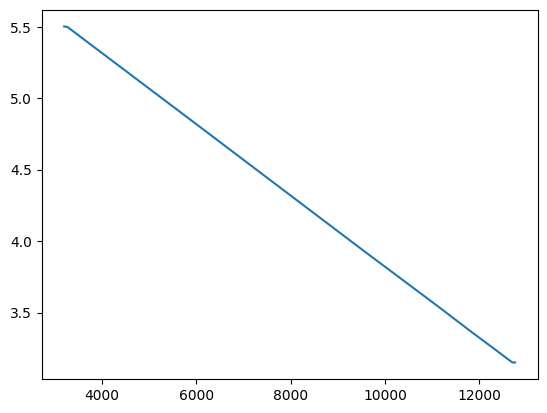

In [168]:
act_cable_columns = [col for col in jump_df.columns if 'activated_cable' in col]
act_cable_columns.insert(0, 'time')

act_cable_df = jump_df[act_cable_columns]

# Remove the first 5 characters from each column name (except the time column)
act_cable_df.columns = ['time'] + [col[6:] for col in act_cable_df.columns[1:]]

plt.plot(act_cable_df['(activated_cable c1).CurrLen'][comp_start_index:comp_end_index])

act_cable_df.head()